# A distance based method: k-Nearest Neighbours

One of the simples and intuitive methods in supervised learning, yet a common ground for more specific and powerful methods.  
The idea is simple:  
if two inputs $x$ ad $x*$ are **close** to each other in the input space, then their corresponding outputs $y$ and $y*$ should be similar.  

This assumption reflects a form of smoothness of the underlying input–output relationship.  
Rather than explicitly learning a parametric function, k-NN bases its predictions directly on the observed training data.
Given a new input $x^∗$, the idea is to:  
• search for training inputs xi that are close to $x^∗$;  
• combine their associated outputs yi to produce a prediction $\hat{y}^∗$.  

## Distance measure

The k-NN needs a notion for the concept of **closeness**. For simplicity we can use the *Euclidean* distance between *two input vectors $xi$ and $x*$*.  

$ ||x_{i} - x^*||_{2}   = \sqrt {\sum _{j=1}^{p}  \left( x_{ij}-x^*_{j}\right)^2 } $

## The set of k nearest neighbours

In order to compute the prediction $\hat{y}^*$, we don't evaluate the whole outputs vector $y$, but just a *set* of it. The index set - the set of the indices of the k nearest neighbours - is defined as:  
$ N^* = \{ i: x_{i} \text{ is among the k closest points of } x^* \} $  
where k is the nuber of neighbours.  
So we evaluate only the outputs in the set:
$ \{y_i : i ∈ N^* \} $

# Prediction Rules

Once we have defined the set of outputs to use in order to compute the prediction, how do we actually compute it?  

For **regression** problems, where the ouput consists of numerical values, whe use the avarage of the outputs belonging to the output set:  
$ \hat{y}^* = \frac{1}{k}\sum_{i\in\mathcal{N}^*} y_i $  
  

For **classification** problems, where the output consists of categorical values, we use the most frequent class among the neighbours:  
$ \hat{y}^* = \arg\max_{c\in\mathcal{C}} \sum_{i\in\mathcal{N}^*} \mathbf{1}\{y_i = c\} $  
where $C$ denotes the set of classes and $1\{.\}$ denotes the indicator function.  

$ 1_A(x)=\begin{cases}1&\text{if }x\in A\\ 0&\text{if }x\notin A\end{cases} $

# The k-NN algorithm

Given a training set $\mathcal{T} = \{(x_i, y_i)\}_{i=1}^n$, a positive integer $k$, and a test input $x^∗$:  
1. Compute the euclidean distances of $x_i$ for all $i = 1 .. n $ (whole input space);   
2. Identify the index set $N^∗$ of the $k$ closest training points;  
3. Predict $\hat{y}^*$ based on the type of task (classification or regression).  

## The value of $k$
But *how* do we chose the value of *k*?  
$k$ is an **hyperparameter** since it has a direct impact on the behavior of the **predictor**.  From a statistical perspective, the behavior caused by the value of $k$ can be interpreted in terms of *bias-variance trade-off*:  
- small value of $k$ => low bias, high variance (flexible model, strict to training data, abrupt changes based on inputs)  
- high value of $k$ => high bias, low variance (smoother predictions since using many samples)  

In practice, the value of k is typically selected using cross-validation on the
training set.

## Feature scaling
Since k-NN is highly impacted by the *closeness* of the inputs, the scale of such input features has a strong influence on the predictions. In this case, if we use Euclidean distance without preprocessing, the feature with the largest numerical scale will dominate.  
This is why for distance-based methods, whe need the pre-apply *feature scaling algorithms*.  

The most common strategies are **standardization (z-score)** and **normalization (to [0,1])**. The former is preferred for continuous features.  

*Standardization*: $\mathbf{x}_{ij}^{\mathrm{std}} = \frac{x_{ij}-\mu_j}{\sigma_j}$ where $\mu_j$ and $\sigma_j$ denote the mean and standard deviation of feature $j$ computed on the training set.  
*Normalization*: $ x_{ij}^{\mathrm{norm}}=\frac{x_{ij}-\min(x_j)}{\max(x_j)-\min(x_j)} $

# Decision boundaries - $Classification$

In classification problems the predictor defines a mapping function, which maps to each input in the input space a *class label*.

$ \hat{f} : R^p → C $

This mapping implicitly partitions the input space into *decision regions*  
$ R_c = \{ x : \hat{f}(x) = c \} $ for each class $ c \in C $.  
The *decision regions* are separated by *decision boundaries*.

For $ k = 1 $ (formerly voronoi cells) each training sample defines its own region of influence, and each point is assigned to the label of the nearest neighbour.  
As $k$ increases decision boundaries become smoother and less sensitive to individual training points. This is the geometric interpretation of the bias-variance trade-off.  

An important observation is that the k-NN method produces predictions that are *piecewise constant* functions of the input.

$ |x| = \begin{cases} -x, & x < 0 \\ x, & x \ge 0 \end{cases} $  

The input space is divided into $M$ disjoint regions $\{ R_m \}_{m=1}^M $. In each region, for whatever $ x \in R_m $ the output $\hat{y}$ of the predictor is constant.  

$ \hat{y}=c_m \text{  for all } x \in R_m $ where $c_m$ depends on the outputs of the $k$ nearest neighbours associated to the region $ R_m $.

For $k-NN$ algorithms these regions are defined implicitely based on the distance metrics and the position of training data in space. Other algorithms (like *decision trees*) use explicit rules in order to define the decision regions.


# Key Note
k-nearest neighbours define piecewise-constant predictors through implicit, distancebased regions;


In [1]:
!pip install pandas scikit-learn matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
train_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/sample_data/california_housing_train.csv")
test_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/sample_data/california_housing_test.csv")

print(train_set.info())

<class 'pandas.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


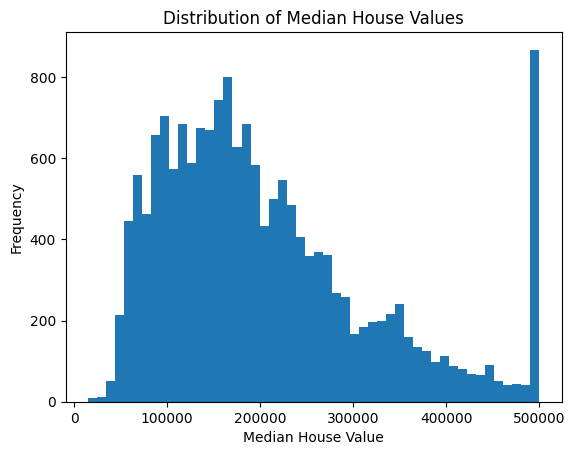

In [8]:
# Plot the distribution of the target variable (median_house_value)
import matplotlib.pyplot as plt
plt.hist(train_set["median_house_value"], bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Values")
plt.show()

**Research question**: can we *predict* the median_house_value based on the features that we have in our dataset?

A) We assume that the samples in our dataset $T$ are indipendent and identically distributed.  
B) This is a *regression problem* since we deal with numerical output variables.

In [3]:
# Normalize Train Data. Since we are dealing with continuous features, let's use Standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# The StandardScaler from sklearn is exactly what we want: { z = (x - u) / s } where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
train_set_scaled = scaler.fit_transform(train_set.drop("median_house_value", axis=1))
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns[:-1])
train_set_scaled["median_house_value"] = train_set["median_house_value"]
train_set_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543,66900.0
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483,80100.0
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105,85700.0
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600,73400.0
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454,65500.0


In [4]:
# Now let's use k-NN to predict the median house value based on the other features. We will use the KNeighborsRegressor from sklearn.
X = train_set_scaled.drop("median_house_value", axis=1)
y = train_set_scaled["median_house_value"]

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)
# Now let's predict the median house value for the test set. We need to apply the same scaling to the test set as we did to the train set.
test_set_scaled = scaler.transform(test_set.drop("median_house_value", axis=1)) # Scaled test
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns[:-1])  # Convert to DataFrame
test_set_scaled["median_house_value"] = test_set["median_house_value"]  # Add the target variable back to the scaled test set

X_test = test_set_scaled.drop("median_house_value", axis=1)
y_test = test_set_scaled["median_house_value"]
y_pred = knn.predict(X_test)

print("Predictions:", y_pred[:5])
print("Actual values:", y_test[:5].values)

Predictions: [362420. 200380. 263660. 272640.  74840.]
Actual values: [344700. 176500. 270500. 330000.  81700.]


In [5]:
# Now let's evaluate the performance of our model using Mean Absolute Error (MAE).
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 42687.0638


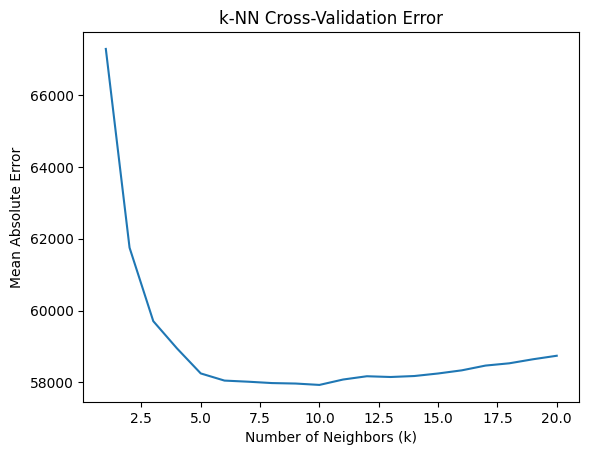

In [ ]:
# Let's find a proper value for k using cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_error')
    cv_scores.append(-scores.mean())

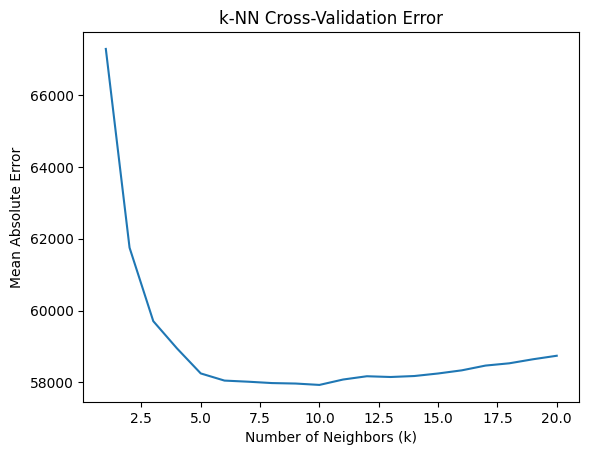

[np.float64(67282.86194117647), np.float64(61751.704941176475), np.float64(59706.70288235294), np.float64(58947.50988235294), np.float64(58252.15343529412), np.float64(58052.84826470588), np.float64(58021.776966386555), np.float64(57983.84458088236), np.float64(57970.630143790855), np.float64(57932.30104705882), np.float64(58082.84675935829), np.float64(58173.782499999994), np.float64(58152.74720361992), np.float64(58179.99561344539), np.float64(58250.508027450975), np.float64(58338.28187132353), np.float64(58470.80374048442), np.float64(58533.861277777774), np.float64(58646.40932198144), np.float64(58744.08515882354)]
Best k: 10


In [ ]:
plt.plot(k_values, cv_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Absolute Error")
plt.title("k-NN Cross-Validation Error")
plt.show()
print("Best k:", k_values[np.argmin(cv_scores)])

In [12]:
# Looks like for k = 10 we get the lowest MAE. Let's retrain our model with k = 10 and evaluate it on the test set.
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with k=10:", mae)

Mean Absolute Error with k=10: 41799.176666666666
